# DS-7331 Machine Learning Project 3
## Airbnb Clustering Tasks
### Allen Miller, Ana Glaser, Jake Harrison, Lola Awodipe

https://nbviewer.jupyter.org/github/allenmiller17/SMU_7331_ML1_Projects/blob/main/Project_2_Final_Team.ipynb

In [2]:
#loading libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split

import numpy as np
from scipy import stats

from sklearn import metrics as mt

from sklearn.cluster import KMeans

In [ ]:
import os
print(os.getcwd())

In [3]:
pdata = pd.read_csv("airbnb1.csv")

In [4]:
pdata['price'] = np.exp(pdata.log_price)

In [5]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30739 entries, 0 to 30738
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      30739 non-null  int64  
 1   log_price               30739 non-null  float64
 2   property_type           30739 non-null  object 
 3   room_type               30739 non-null  object 
 4   accommodates            30739 non-null  int64  
 5   bathrooms               30645 non-null  float64
 6   bed_type                30739 non-null  object 
 7   cancellation_policy     30739 non-null  object 
 8   cleaning_fee            30739 non-null  bool   
 9   city                    30739 non-null  object 
 10  description             30739 non-null  object 
 11  first_review            24150 non-null  object 
 12  host_has_profile_pic    30648 non-null  object 
 13  host_identity_verified  30648 non-null  object 
 14  host_response_rate      23119 non-null

In [9]:
pdata.nunique()

id                        30739
log_price                   614
property_type                 6
room_type                     3
accommodates                 16
bathrooms                    17
bed_type                      5
cancellation_policy           5
cleaning_fee                  2
city                          6
description               30615
first_review               2234
host_has_profile_pic          2
host_identity_verified        2
host_response_rate           76
host_since                 2902
instant_bookable              2
last_review                1132
latitude                  30731
longitude                 30713
neighbourhood               571
number_of_reviews           314
review_scores_rating         48
zipcode                     606
bedrooms                     11
beds                         17
price                       614
region                        2
dtype: int64

In [10]:
#transforming the property type to a binary classification
value_list = ["Apartment","House","Condominium","Townhouse","Loft"]
boolean_series = ~pdata.property_type.isin(value_list)
filtered_df = pdata[boolean_series]

filtered_df.head(100)

for i in list (filtered_df.index):
    pdata.loc[i,'property_type'] = "other"

#transforming the longitude and latitude variables to East / West
pdata["region"] = pd.cut(pdata.longitude,[-200,-100,0],2,labels=["West","East"])

In [11]:
#evaluating the data after transformation
pdata.head()

id  log_price property_type        room_type  accommodates  \
0   6901257   5.010635     Apartment  Entire home/apt             3   
1   6304928   5.129899     Apartment  Entire home/apt             7   
2   7919400   4.976734     Apartment  Entire home/apt             5   
3  13418779   6.620073         House  Entire home/apt             4   
4   3808709   4.744932     Apartment  Entire home/apt             2   

   bathrooms  bed_type cancellation_policy  cleaning_fee city  ...   latitude  \
0        1.0  Real Bed              strict          True  NYC  ...  40.696524   
1        1.0  Real Bed              strict          True  NYC  ...  40.766115   
2        1.0  Real Bed            moderate          True  NYC  ...  40.808110   
3        1.0  Real Bed            flexible          True   SF  ...  37.772004   
4        1.0  Real Bed            moderate          True   DC  ...  38.925627   

    longitude     neighbourhood number_of_reviews review_scores_rating  \
0  -73.991617  Brooklyn Heights                 2                100.0   
1  -73.989040    Hell's Kitchen                 6                 93.0   
2  -73.943756            Harlem                10                 92.0   
3 -122.431619      Lower Haight                 0                  NaN   
4  -77.034596  Columbia Heights                 4                 40.0   

  zipcode bedrooms beds  price  region  
0   11201      1.0  1.0  150.0    East  
1   10019      3.0  3.0  169.0    East  
2   10027      1.0  3.0  145.0    East  
3   94117      2.0  2.0  750.0    West  
4   20009      0.0  1.0  115.0    East  

[5 rows x 28 columns]

In [12]:
#Encoding boolean and categorical variables
replaceStruct = {
                "cleaning_fee":     {True: 1, False: 0},
                "instant_bookable":     {"t": 1, "f": 0},
                "host_identity_verified":     {"t": 1, "f": 0},
                "property_type":     {"Apartment": 0,"House": 1,"Condominium": 2,"Townhouse": 3,"Loft": 4, "other": 5},
                "region": {"East": 0, "West": 1},
                "room_type": {"Entire home/apt": 0, "Private room": 1, "Shared room": 2},
                "bed_type": {"Real Bed": 0, "Futon": 1, "Pull-out Sofa": 2, "Couch": 3, "Airbed": 4},
                "city": {"NYC": 0, "SF": 1, "DC": 2, "LA": 3, "Chicago": 4, "Boston": 5},
                "cancellation_policy": {"strict": 0, "moderate": 1, "flexible": 2, "super_strict_30": 3, "super_strict_60": 4}
                    }

pdata=pdata.replace(replaceStruct)

In [13]:
#pdata.drop(['description','host_response_rate','first_review','host_since','last_review','zipcode','id','latitude','longitude','neighbourhood','host_has_profile_pic'], axis=1, inplace=True)
pdata.drop(['description','host_response_rate','first_review','host_since','last_review','zipcode','id','latitude','longitude','neighbourhood','host_has_profile_pic','cleaning_fee','instant_bookable','host_identity_verified','property_type','region','room_type','bed_type','city','cancellation_policy'], axis=1, inplace=True)

#pdata.drop(['cleaning_fee','instant_bookable','host_identity_verified','property_type','region','room_type','bed_type','city','cancellation_policy'])

In [14]:
#evaluating the data after transformation
pdata.head()

log_price  accommodates  bathrooms  number_of_reviews  \
0   5.010635             3        1.0                  2   
1   5.129899             7        1.0                  6   
2   4.976734             5        1.0                 10   
3   6.620073             4        1.0                  0   
4   4.744932             2        1.0                  4   

   review_scores_rating  bedrooms  beds  price  
0                 100.0       1.0   1.0  150.0  
1                  93.0       3.0   3.0  169.0  
2                  92.0       1.0   3.0  145.0  
3                   NaN       2.0   2.0  750.0  
4                  40.0       0.0   1.0  115.0

In [15]:
pdata.nunique()

log_price               614
accommodates             16
bathrooms                17
number_of_reviews       314
review_scores_rating     48
bedrooms                 11
beds                     17
price                   614
dtype: int64

In [16]:
pdata = pdata.dropna()

In [17]:
#Scale the data and deploy model

from scipy.stats import zscore

pdata_z = pdata.apply(zscore)

Text(0.5, 1.0, 'K Optimization Graph')

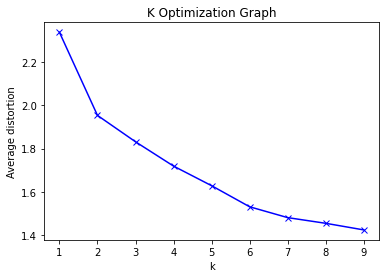

In [18]:
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(pdata_z)
    prediction=model.predict(pdata_z)
    meanDistortions.append(sum(np.min(cdist(pdata_z, model.cluster_centers_, 'euclidean'), axis=1)) / pdata_z
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('K Optimization Graph')

In [19]:
KNNModel = KMeans(n_clusters=5, n_init = 3, random_state=2345)
KNNModel.fit(pdata_z)
prediction=KNNModel.predict(pdata_z)
pdata_z["GROUP"] = prediction
pdata["GROUP"] = prediction

In [20]:
#Assess the distribution of clusters formed
pdata_z['GROUP'].value_counts()  

4    14029
1     4697
2     1971
0     1791
3     1198
Name: GROUP, dtype: int64

In [21]:
pdata_z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23686 entries, 0 to 30735
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   log_price             23686 non-null  float64
 1   accommodates          23686 non-null  float64
 2   bathrooms             23686 non-null  float64
 3   number_of_reviews     23686 non-null  float64
 4   review_scores_rating  23686 non-null  float64
 5   bedrooms              23686 non-null  float64
 6   beds                  23686 non-null  float64
 7   price                 23686 non-null  float64
 8   GROUP                 23686 non-null  int32  
dtypes: float64(8), int32(1)
memory usage: 1.7 MB


In [ ]:
#centroids = KNNModel.cluster_centers_
#centroids

In [22]:
pdata_z.head()

log_price  accommodates  bathrooms  number_of_reviews  \
0   0.387836     -0.104785   -0.40446          -0.606958   
1   0.564938      1.735725   -0.40446          -0.510150   
2   0.337493      0.815470   -0.40446          -0.413342   
4  -0.006724     -0.564912   -0.40446          -0.558554   
5  -0.455600     -0.564912   -0.40446          -0.582756   

   review_scores_rating  bedrooms      beds     price  GROUP  
0              0.750683 -0.305115 -0.579447  0.011396      4  
1             -0.138713  2.063599  0.985879  0.149352      1  
2             -0.265770 -0.305115  0.985879 -0.024908      1  
4             -6.872716 -1.489471 -0.579447 -0.242734      0  
5              0.750683 -0.305115 -0.579447 -0.460559      4

In [23]:
pdata_z.nunique()

log_price               542
accommodates             16
bathrooms                16
number_of_reviews       313
review_scores_rating     48
bedrooms                 11
beds                     16
price                   542
GROUP                     5
dtype: int64

<Figure size 360x360 with 0 Axes>

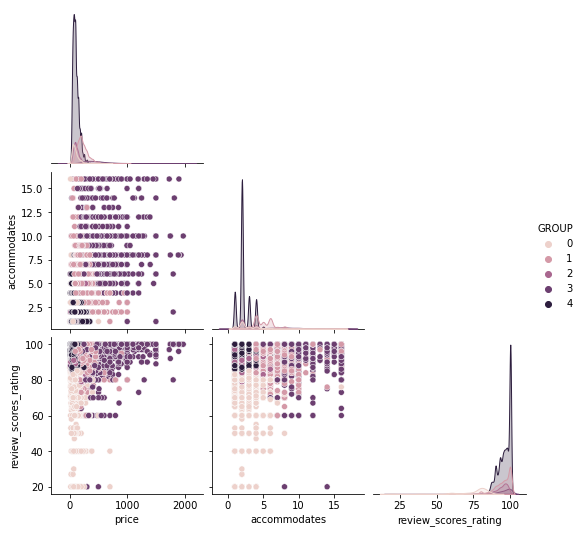

In [24]:
#https://seaborn.pydata.org/generated/seaborn.pairplot.html

plt.figure(figsize=(5,5))
sns.pairplot(pdata,vars=pdata[['price','accommodates','review_scores_rating']], hue = "GROUP" ,diag_kind = 'kde', corner = True)
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=40)
labels = KNNModel.labels_
ax.scatter(pdata_z.iloc[:, 12], pdata_z.iloc[:,0], pdata_z.iloc[:,5],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Rating')
ax.set_ylabel('Log Price')
ax.set_zlabel('Bed Type')
ax.set_title('3D plot of KMeans Clustering')

In [25]:
import plotly.express as px

fig = px.scatter_3d(pdata, x='review_scores_rating', y='price', z='accommodates', color='GROUP')
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [ ]:
dataset=pdata[:]  #creating a copy of the data 
dataset['KmeansLabel']=KNNModel.labels_

In [ ]:
plt.scatter(dataset['price'], dataset['review_scores_rating'], c=KNNModel.labels_,)  
plt.show()

#pdata.boxplot(by="GROUP", figsize=(25, 25))

In [ ]:
#fig1 = px.violin(pdata, y="price", x="accommodates", color="GROUP", box=True, points="all")
#fig1.show()

In [ ]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [ ]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

linkage_methods = ['single', 'complete', 'average', 'ward', 'median']

results_cophenetic_coef=[]

for i in linkage_methods :
    #plt.figure(figsize=(15,13))
    #plt.xlabel('sample index')
    #plt.ylabel('Distance')
    Z = linkage(pdata_z, i)
    cc, coph_dists = cophenet(Z , pdist(pdata_z))
    #dendrogram(Z,leaf_rotation=90.0, p=5, leaf_font_size=10, truncate_mode='level')
    #plt.tight_layout()
    #plt.title("Linkage Type: "+ i +" having cophenetic coefficient : "+str(round(cc,3)) )
    #plt.show()
    results_cophenetic_coef.append((i,cc))
    #print (i,cc)

In [ ]:
results_cophenetic_coef_df=pd.DataFrame(results_cophenetic_coef,columns=['LinkageMethod','CopheneticCoefficient'])
results_cophenetic_coef_df

In [ ]:
# cophenet index 
Z = linkage(pdata_z, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(pdata_z))

c

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8. , truncate_mode = 'lastp',p=20)
plt.tight_layout()

In [ ]:
# cophenet index 
Z1 = linkage(pdata_z, metric='euclidean', method='ward')
c1, coph_dists1 = cophenet(Z1 , pdist(pdata_z))

c1

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram - ward')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z1, leaf_rotation=90., leaf_font_size=8. , truncate_mode = 'lastp',p=20)
plt.tight_layout()

In [ ]:
# cophenet index 
Z2 = linkage(pdata_z, metric='euclidean', method='complete')
c2, coph_dists2 = cophenet(Z2 , pdist(pdata_z))

c2



In [ ]:

plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram - complete')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z2, leaf_rotation=90., leaf_font_size=8. , truncate_mode = 'lastp',p=20)
plt.tight_layout()


In [ ]:
# cophenet index 
Z3 = linkage(pdata_z, metric='euclidean', method='centroid')
c3, coph_dists3 = cophenet(Z3 , pdist(pdata_z))

c3



In [ ]:

plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram - centroid')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z2, leaf_rotation=90., leaf_font_size=8. , truncate_mode = 'lastp',p=20)
plt.tight_layout()


In [ ]:
#evaluating categorical value count for one-hot-encoding
pdata_cls.nunique()

In [ ]:
#one hot encoding categorical variables and dropping columns that are not used
oneHotCols=["room_type","bed_type","city","cancellation_policy","region"]
pdata_cls.drop(['description','host_response_rate','first_review','host_since','last_review','zipcode','id','latitude','longitude','neighbourhood','cleaning_fee','host_has_profile_pic'], axis=1, inplace=True)
pdata_cls=pd.get_dummies(pdata_cls, columns=oneHotCols,drop_first=True)
pdata_cls.head(10)

In [ ]:
# Creating the X and y variables for the Classification Model
X_cls = pdata_cls.drop('property_type',axis=1).values     
y_cls = pdata_cls['property_type'].values

#Scaling the Classification input
yhat_cls = np.zeros(y_cls.shape) # we will fill this with predictions
scl_cls = StandardScaler()
X_scaled_cls = scl_cls.fit_transform(X_cls)

In [ ]:
#Describe the final dataset
pdata_cls.info()

In [ ]:
max_d=5
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')

In [ ]:
set(clusters)  # So there are 3 clusters which are formed 

In [ ]:
dataset['HierarchicalClusteringLabel']=clusters

In [ ]:
from sklearn.metrics import silhouette_score
Kmeans_score =  silhouette_score(dataset.drop('KmeansLabel',axis=1),dataset['KmeansLabel'])
print("Kmeans silhouette : ", Kmeans_score)


In [ ]:
Hierarchical_score = silhouette_score(dataset.drop('HierarchicalClusteringLabel',axis=1),dataset['HierarchicalClusteringLabel'])
print("Hierarchical silhouette ; ", Hierarchical_score)

In [ ]:
Kmeans_results=dataset.groupby('KmeansLabel').mean()
Kmeans_results

In [ ]:
Hierarchical_results=dataset.groupby('HierarchicalClusteringLabel').mean()
Hierarchical_results

In [ ]:
DBScan_results=dataset.groupby('labelsDBScan').mean()
DBScan_results

### DBScan

In [30]:

X_all = pdata_z[["log_price","accommodates","bathrooms","number_of_reviews","review_scores_rating","bedrooms","beds","price"]].values 
n_clusters = 10
#marker_colors = ['r', 'b', 'r', 'r', 'r', 'b', 'r', 'b']

scl_obj = StandardScaler()
scl_obj.fit(X_all) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_scaled= scl_obj.transform(X_all) # apply to training


In [34]:
modelDBSCAN = DBSCAN(eps=0.99, min_samples=10).fit(X_scaled)

labelsDBSCAN = modelDBSCAN.labels_

In [41]:
modelDBSCANAll = DBSCAN(eps=0.8, min_samples=15).fit(X_scaled)

labelsDBSCANAll = modelDBSCANAll.labels_


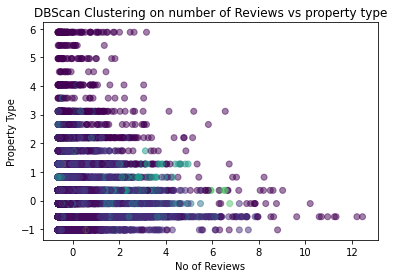

In [51]:
plt.scatter(pdata_z.number_of_reviews, pdata_z.accommodates,  c=labelsDBSCAN, alpha=0.5)
plt.title("DBScan Clustering on number of Reviews vs property type")
plt.xlabel("No of Reviews")
plt.ylabel("Property Type")
plt.show()

In [54]:

# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X_all)

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [55]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)



In [61]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))



Estimated number of clusters: 54
Estimated number of noise points: 10591
Silhouette Coefficient: -0.328


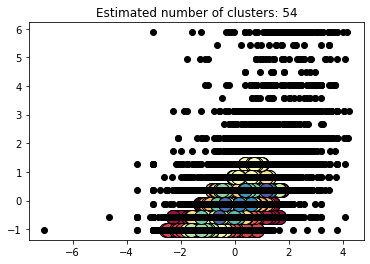

In [62]:
# Plot result
import matplotlib.pyplot as plt
%matplotlib inline

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [71]:
X_3dAll = pdata_z.copy()

import plotly.express as px

fig = px.scatter_3d(pdata_z, x='log_price', y='beds', z='bedrooms', color='GROUP')
fig.show()

fig = px.scatter_3d(pdata_z, x='review_scores_rating', y='price', z='accommodates', color='GROUP')
fig.show()


In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
X, y = make_circles(n_samples=2000, factor=0.3, noise=0.1)
X = StandardScaler().fit_transform(X_all)
y_pred = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)


Number of clusters: 54
Silhouette Coefficient: -0.328


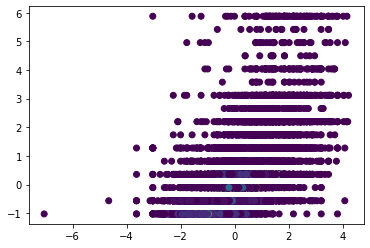

In [69]:

plt.scatter(X[:,0], X[:,1], c=y_pred)
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

##### 2.3.2 K-Nearest Neighbors Classification

In [63]:
get_ipython().run_line_magic('time', '')
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline


#pipe = make_pipeline(('scale', StandardScaler()),  ('knn', KNeighborsClassifier()))

pipe = Pipeline([('scale', StandardScaler()),  
                         ('knn', KNeighborsClassifier())]) 

# Define a range of hyper parameters for grid search
parameters = { 'knn__n_neighbors': [10,45,50]
              , 'knn__algorithm' : ["auto", "ball_tree", "kd_tree", "brute"]
             }

#Perform the grid search using accuracy as a metric during cross validation.
gridKnn = GridSearchCV(pipe, parameters, cv=cv, scoring='accuracy') # can try f1_micro, f1_maco accuracy....

#Use the best features from recursive feature elimination during the grid search
gridKnn.fit(X_train_scaled_cls, y_train_cls)

#display the best pipeline model identified during the grid search
gridKnn.best_estimator_

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.82 µs


NameError: name 'cv' is not defined

In [ ]:
gridKnn.best_params_

In [ ]:
KNNmodelFINAL = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 45) # get object
KNNmodelFINAL.fit(X_train_scaled_cls, y_train_cls)
KNNy_hat = KNNmodelFINAL.predict(X_test_scaled_cls)

In [ ]:
from sklearn.model_selection import cross_val_score
KNNaccuracies = cross_val_score(KNNmodelFINAL, X_scaled_cls, y=y_cls, cv=cv) # this also can help with parallelism
print(KNNaccuracies)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

print("Training accuracy",round(KNNmodelFINAL.score(X_train_scaled_cls,y_train_cls),ndigits=3))
print()
print("Testing accuracy",round(mt.accuracy_score(y_test_cls, KNNy_hat),ndigits=3))
print()
print('Confusion Matrix')
print(draw_cm(y_test_cls,KNNy_hat))

print(classification_report(y_test_cls,KNNy_hat))

In [ ]:
KNN_ac = round(mt.accuracy_score(y_test_cls, KNNy_hat),ndigits=3)

print(KNN_ac)

In [ ]:
Kmeans_results.plot.bar()

In [ ]:
# referenced from class example
from sklearn import metrics
from sklearn.cluster import KMeans

seuclid = []
scosine = []
k = range(2,10)
for i in k:
    kmeans_model = KMeans(n_clusters=i, init="k-means++").fit(pdata_z)
    labels = kmeans_model.labels_
    seuclid.append(metrics.silhouette_score(pdata_z, labels, metric='euclidean'))
    scosine.append(metrics.silhouette_score(pdata_z, labels, metric='cosine'))
    
plt.figure(figsize=(10,5))
plt.plot(k,seuclid,label='euclidean')
plt.plot(k,scosine,label='cosine')
plt.ylabel("Silhouette")
plt.xlabel("Cluster")
plt.title("Silhouette vs Cluster Size")
plt.legend()
plt.show()